## Objective 1 Prediction

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('rawdata.xlsx')
df.date = pd.to_datetime(df.date)
df.head()

,Observed,metername,date,gallons
0,1,Bldg. T (Cooling),2020-03-29,32842.4
1,2,Bldg. T (Cooling),2020-04-05,44470.1
2,3,Bldg. T (Cooling),2020-04-12,39840.6
3,4,Bldg. T (Cooling),2020-04-19,33768.5
4,5,Bldg. T (Cooling),2020-04-26,35640.4


### Combine two kinds of water usage

In [5]:
df2=df.truncate(before='0',after='92')

In [6]:
df3=df.truncate(before='93').reset_index(drop=True)

In [7]:
df2['gallons2']=df3['gallons'].astype('float')

In [8]:
df2['total gallons']=df2['gallons2']+df2['gallons']
df2.drop(labels = ['Observed', 'metername'], axis = 1, inplace = True)

In [9]:
df2.head(10)

,date,gallons,gallons2,total gallons
0,2020-03-29,32842.4,48020.0,80862.4
1,2020-04-05,44470.1,48260.0,92730.1
2,2020-04-12,39840.6,48092.0,87932.6
3,2020-04-19,33768.5,46176.0,79944.5
4,2020-04-26,35640.4,30048.0,65688.4
5,2020-05-03,31490.4,33638.0,65128.4
6,2020-05-10,30595.6,44687.0,75282.6
7,2020-05-17,31582.6,46544.0,78126.6
8,2020-05-24,34025.8,31422.0,65447.8
9,2020-05-31,37762.9,43156.0,80918.9


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           93 non-null     datetime64[ns]
 1   gallons        93 non-null     float64       
 2   gallons2       93 non-null     float64       
 3   total gallons  93 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.0 KB


<Figure size 720x360 with 0 Axes>

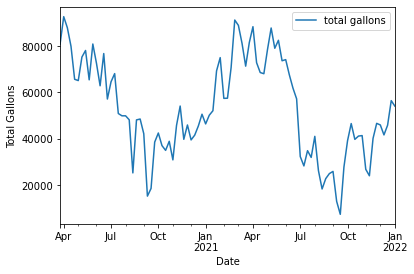

In [66]:
fig= plt.figure(figsize=(10,5))
df2.plot('date','total gallons')
plt.xlabel('Date')
plt.ylabel('Total Gallons')
plt.savefig('Trend.png', dpi=450,bbox_inches="tight")

### Foracasting the water usage for the next four weeks

In [23]:
from autots import AutoTS
model = AutoTS(forecast_length=4, frequency='infer', ensemble='all',max_generations=15,num_validations=2,validation_method="backwards")
model = model.fit(df2, date_col='date', value_col='total gallons', id_col=None)

Inferred frequency is: W-SUN
Model Number: 1 with model AverageValueNaive in generation 0 of 15
Model Number: 2 with model AverageValueNaive in generation 0 of 15
Model Number: 3 with model AverageValueNaive in generation 0 of 15
Model Number: 4 with model DatepartRegression in generation 0 of 15
Model Number: 5 with model DatepartRegression in generation 0 of 15
Model Number: 6 with model DatepartRegression in generation 0 of 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 15
Epoch 1/50
3/3 [==============================] - 3s 3ms/step - loss: 0.3746
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3654
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3565
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3511
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3481
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3383
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3278
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3340
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3197
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3138
Epoch 11/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3075
Epoch 12/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3010
Epoch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 44 with model SeasonalNaive in generation 0 of 15
Model Number: 45 with model GLM in generation 0 of 15
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 15
Template Eval Error: ValueError('x must have 2 complete cycles requires 104 observations. x only has 89 observation(s)') in model 46: ETS
Model Number: 47 with model FBProphet in generation 0 of 15
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 47: FBProphet
Model Number: 48 with model GluonTS in generation 0 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 15
Template Eval Error: ValueError('x must have 2 complete cycles requires 104 observations. x only has 8

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 53 with model DatepartRegression in generation 0 of 15
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 53: DatepartRegression
Model Number: 54 with model UnivariateMotif in generation 0 of 15
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 54: UnivariateMotif
Model Number: 55 with model MultivariateMotif in generation 0 of 15
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 55: MultivariateMotif
Model Number: 56 with model SectionalMotif in generation 0 of 15
Model Number: 57 with model NVAR in generation 0 of 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Number: 58 with model Theta in generation 0 of 15
Template Eval Error: KeyError(Timestamp('2020-03-29 00:00:00', freq='W-SUN')) in model 58: Theta
Model Number: 59 with model ARDL in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 59: ARDL
Model Number: 60 with model NVAR in generation 0 of 15
Model Number: 61 with model MultivariateMotif in generation 0 of 15
Template Eval Error: ValueError('x must have 2 complete cycles requires 104 observations. x only has 89 observation(s)') in model 61: MultivariateMotif
Model Number: 62 with model UnobservedComponents in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 62: UnobservedComponents
Model Number: 63 with model VAR in generation 0 of 15
Template Eval Error: ValueError('Only gave one variable to VAR') in model 63: VAR
Model Number: 64 with model ARDL in generation 0 of 15
Template Eval Error:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Number: 72 with model AverageValueNaive in generation 0 of 15
Model Number: 73 with model ZeroesNaive in generation 0 of 15
Model Number: 74 with model UnobservedComponents in generation 0 of 15
Template Eval Error: ValueError('Shape of passed values is (89, 90), indices imply (89, 1)') in model 74: UnobservedComponents
Model Number: 75 with model UnivariateMotif in generation 0 of 15
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 75: UnivariateMotif
Model Number: 76 with model FBProphet in generation 0 of 15
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 76: FBProphet
Model Number: 77 with model SeasonalNaive in generation 0 of 15
Model Number: 78 with model VAR in generation 0 of 15
Template Eval Error: ValueError('Shape of passed values is (89, 90), indices imply (89, 1)') in model 78: VAR
Model Number: 79 with model SectionalMotif in generation 0 of 15
Model Number: 80 wit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


Model Number: 81 with model UnobservedComponents in generation 0 of 15
Model Number: 82 with model FBProphet in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 82: FBProphet
Model Number: 83 with model GLS in generation 0 of 15
Model Number: 84 with model AverageValueNaive in generation 0 of 15
Model Number: 85 with model ARDL in generation 0 of 15
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\ProgramData\\Anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 85: ARDL
Model Number: 86 with model SeasonalNaive in generation 0 of 15
Model Number: 87 with model VAR in generation 0 of 15
Template Eval Error: ValueError('Only gave one variable to VAR') in model 87: VAR
Model Number: 88 with model DatepartRegression in generation 0 of 15
Model Number: 89 with model GLS in generation 0 of 15


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 90 with model VAR in generation 0 of 15
Template Eval Error: ValueError('Only gave one variable to VAR') in model 90: VAR
Model Number: 91 with model SeasonalNaive in generation 0 of 15
Model Number: 92 with model VECM in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 92: VECM
Model Number: 93 with model ETS in generation 0 of 15
Model Number: 94 with model VAR in generation 0 of 15
Template Eval Error: ValueError('Only gave one variable to VAR') in model 94: VAR
Model Number: 95 with model WindowRegression in generation 0 of 15
Epoch 1/200
2/2 [==============================] - 1s 160ms/step - loss: 0.3574 - val_loss: 0.3188
Epoch 2/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3267 - val_loss: 0.3095
Epoch 3/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3023 - val_loss: 0.3025
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 0.2997 - val

Model Number: 136 with model GluonTS in generation 0 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 136: GluonTS
Model Number: 137 with model SeasonalNaive in generation 0 of 15
Model Number: 138 with model UnobservedComponents in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 138: UnobservedComponents
Model Number: 139 with model GLS in generation 0 of 15
Template Eval Error: ValueError('x must have 2 complete cycles requires 104 observations. x only has 44 observation(s)') in model 139: GLS
New Generation: 1 of 15
Model Number: 140 with model WindowRegression in generation 1 of 15
Model Number: 141 with model WindowRegression in generation 1 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 141: WindowRegression
Model Number: 142 with model WindowRegression in generation 1 of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 143 with model DatepartRegression in generation 1 of 15
Model Number: 144 with model DatepartRegression in generation 1 of 15


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 145 with model DatepartRegression in generation 1 of 15
Model Number: 146 with model LastValueNaive in generation 1 of 15
Model Number: 147 with model LastValueNaive in generation 1 of 15
Model Number: 148 with model LastValueNaive in generation 1 of 15
Model Number: 149 with model NVAR in generation 1 of 15
Model Number: 150 with model NVAR in generation 1 of 15
Model Number: 151 with model NVAR in generation 1 of 15
Model Number: 152 with model NVAR in generation 1 of 15
Model Number: 153 with model SeasonalNaive in generation 1 of 15
Model Number: 154 with model SeasonalNaive in generation 1 of 15
Model Number: 155 with model SeasonalNaive in generation 1 of 15
Model Number: 156 with model SeasonalNaive in generation 1 of 15
Model Number: 157 with model AverageValueNaive in generation 1 of 15
Model Number: 158 with model AverageValueNaive in generation 1 of 15
Model Number: 159 with model AverageValueNaive in generation 1 of 15
Model Number: 160 with model GLS in gener

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 184 with model SectionalMotif in generation 1 of 15
Model Number: 185 with model GluonTS in generation 1 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 185: GluonTS
Model Number: 186 with model GluonTS in generation 1 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 186: GluonTS
Model Number: 187 with model GluonTS in generation 1 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 187: GluonTS
Model Number: 188 with model GluonTS in generation 1 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 188: GluonTS
Model Number: 189 with model VAR in generation 1 of 15
Template Eval Error: ValueError('Only gave one variable to VAR') in model 189: VAR
Mode

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 257 with model SectionalMotif in generation 2 of 15
Model Number: 258 with model GluonTS in generation 2 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 258: GluonTS
Model Number: 259 with model GluonTS in generation 2 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 259: GluonTS
Model Number: 260 with model GluonTS in generation 2 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 260: GluonTS
Model Number: 261 with model GluonTS in generation 2 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 261: GluonTS
Model Number: 262 with model VAR in generation 2 of 15
Template Eval Error: ValueError('Only gave one variable to VAR') in model 262: VAR
Mode

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Model Number: 281 with model ARDL in generation 2 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 281: ARDL
Model Number: 282 with model ARDL in generation 2 of 15
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\ProgramData\\Anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 282: ARDL
Model Number: 283 with model ARDL in generation 2 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 283: ARDL
Model Number: 284 with model ARDL in generation 2 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 284: ARDL
New Generation: 3 of 15
Model Number: 285 with model WindowRegression in generation 3 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 285: WindowRegression
Model Number: 286 with model WindowRegression in

Model Number: 292 with model UnobservedComponents in generation 3 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 292: UnobservedComponents
Model Number: 293 with model UnobservedComponents in generation 3 of 15
Model Number: 294 with model LastValueNaive in generation 3 of 15
Model Number: 295 with model LastValueNaive in generation 3 of 15
Model Number: 296 with model NVAR in generation 3 of 15
Model Number: 297 with model NVAR in generation 3 of 15
Model Number: 298 with model NVAR in generation 3 of 15
Model Number: 299 with model NVAR in generation 3 of 15
Model Number: 300 with model SeasonalNaive in generation 3 of 15
Model Number: 301 with model SeasonalNaive in generation 3 of 15
Model Number: 302 with model SeasonalNaive in generation 3 of 15
Model Number: 303 with model SeasonalNaive in generation 3 of 15
Model Number: 304 with model ZeroesNaive in generation 3 of 15
Model Number: 305 with model ZeroesNaive in generat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model Number: 357 with model WindowRegression in generation 4 of 15
Model Number: 358 with model DatepartRegression in generation 4 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 358: DatepartRegression
Model Number: 359 with model DatepartRegression in generation 4 of 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 360 with model DatepartRegression in generation 4 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 360: DatepartRegression
Model Number: 361 with model UnobservedComponents in generation 4 of 15
Model Number: 362 with model UnobservedComponents in generation 4 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 362: UnobservedComponents
Model Number: 363 with model UnobservedComponents in generation 4 of 15
Model Number: 364 with model LastValueNaive in generation 4 of 15
Model Number: 365 with model LastValueNaive in generation 4 of 15
Model Number: 366 with model LastValueNaive in generation 4 of 15
Model Number: 367 with model NVAR in generation 4 of 15
Model Number: 368 with model NVAR in generation 4 of 15
Model Number: 369 with model NVAR in generation 4 of 15
Model Number: 370 with model NVAR in generation 4 of 15
Model Number: 371 with model SeasonalNaive i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1078: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 377: ZeroesNaive
Model Number: 378 with model ETS in generation 4 of 15
Model Number: 379 with model ETS in generation 4 of 15
Model Number: 380 with model ETS in generation 4 of 15
Model Number: 381 with model ETS in generation 4 of 15
Model Number: 382 with model AverageValueNaive in generation 4 of 15
Model Number: 383 with model AverageValueNaive in generation 4 of 15
Model Number: 384 with model AverageValueNaive in generation 4 of 15
Model Number: 385 with model GLS in generation 4 of 15
Model Number: 386 with model GLS in generation 4 of 15
Model Number: 387 with model GLS in generation 4 of 15
Model Number: 388 with model SectionalMotif in generation 4 of 15
Model Number: 389 with model SectionalMotif in generation 4 of 15
Model Number: 390 with model SectionalMotif in generation 4 of 15
Model Number: 391 with model SectionalMotif in generation 4 of 15
Model Numbe

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 400 with model GluonTS in generation 4 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 400: GluonTS
Model Number: 401 with model GluonTS in generation 4 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 401: GluonTS
Model Number: 402 with model GluonTS in generation 4 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 402: GluonTS
Model Number: 403 with model GluonTS in generation 4 of 15
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 403: GluonTS
Model Number: 404 with model VAR in generation 4 of 15
Template Eval Error: ValueError('Only gave one variable to VAR') in model 404: VAR
Model Number: 405 with model VAR in generation 4 of 15
Template Eval E

C:\ProgramData\Anaconda3\lib\site-packages\autots\models\sklearn.py:1248: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.regr = self.regr.fit(X, Y)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:

Model Number: 433 with model DatepartRegression in generation 5 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 433: DatepartRegression
Model Number: 434 with model UnobservedComponents in generation 5 of 15
Template Eval Error: ValueError('Shape of passed values is (89, 90), indices imply (89, 1)') in model 434: UnobservedComponents
Model Number: 435 with model UnobservedComponents in generation 5 of 15


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Model Number: 436 with model UnobservedComponents in generation 5 of 15
Model Number: 437 with model LastValueNaive in generation 5 of 15
Model Number: 438 with model LastValueNaive in generation 5 of 15
Model Number: 439 with model NVAR in generation 5 of 15
Model Number: 440 with model NVAR in generation 5 of 15
Model Number: 441 with model NVAR in generation 5 of 15
Model Number: 442 with model NVAR in generation 5 of 15
Model Number: 443 with model SectionalMotif in generation 5 of 15
Model Number: 444 with model SectionalMotif in generation 5 of 15
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series') in model 444: SectionalMotif
Model Number: 445 with model SectionalMotif in generation 5 of 15
Model Number: 446 with model SectionalMotif in generation 5 of 15
Model Number: 447 with model SeasonalNaive in generation 5 of 15
Model Number: 448 with model SeasonalNaive in generation 5 of 15
Model Number: 449 with model SeasonalNaive in generation 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Model Number: 450 with model SeasonalNaive in generation 5 of 15
Model Number: 451 with model ZeroesNaive in generation 5 of 15
Model Number: 452 with model ZeroesNaive in generation 5 of 15
Model Number: 453 with model ZeroesNaive in generation 5 of 15
Model Number: 454 with model ETS in generation 5 of 15
Model Number: 455 with model ETS in generation 5 of 15
Model Number: 456 with model ETS in generation 5 of 15
Model Number: 457 with model ETS in generation 5 of 15
Model Number: 458 with model AverageValueNaive in generation 5 of 15
Model Number: 459 with model AverageValueNaive in generation 5 of 15
Model Number: 460 with model AverageValueNaive in generation 5 of 15
Model Number: 461 with model GLS in generation 5 of 15
Model Number: 462 with model GLS in generation 5 of 15
Model Number: 463 with model GLS in generation 5 of 15
Model Number: 464 with model Theta in generation 5 of 15
Model Number: 465 with model Theta in generation 5 of 15
Model Number: 466 with model GLM in gene

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Number: 503 with model WindowRegression in generation 6 of 15
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 503: WindowRegression
Model Number: 504 with model WindowRegression in generation 6 of 15
Model Number: 505 with model DatepartRegression in generation 6 of 15
Epoch 1/50
Template Eval Error: TypeError("in user code:\n\n    C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\keras\\engine\\training.py:855 train_function  *\n        return step_function(self, iterator)\n    C:\\ProgramData\\Anaconda3\\lib\\site-packages\\autots\\models\\dnn.py:31 call  *\n        return inputs + delta\n    C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\ops\\math_ops.py:1250 binary_op_wrapper\n        raise e\n    C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\ops\\math_ops.py:1234 binary_op_wrapper\n        return func(x, y, name=name)\n    C:\\ProgramData\\Anaconda

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: ValueError('Only gave one variable to VECM') in model 550: VECM
Model Number: 551 with model VECM in generation 6 of 15
Template Eval Error: ValueError('Only gave one variable to VECM') in model 551: VECM
Model Number: 552 with model VECM in generation 6 of 15
Template Eval Error: ValueError('Only gave one variable to VECM') in model 552: VECM
Model Number: 553 with model FBProphet in generation 6 of 15
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 553: FBProphet
Model Number: 554 with model FBProphet in generation 6 of 15
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 554: FBProphet
Model Number: 555 with model FBProphet in generation 6 of 15
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 555: FBProphet
Model Number: 556 with model FBProphet in generation 6 of 15
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 556: FBProphet
Model Number:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 572 with model GLM in generation 7 of 15
Model Number: 573 with model WindowRegression in generation 7 of 15
Model Number: 574 with model WindowRegression in generation 7 of 15
Model Number: 575 with model WindowRegression in generation 7 of 15
Model Number: 576 with model DatepartRegression in generation 7 of 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Number: 577 with model DatepartRegression in generation 7 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 577: DatepartRegression
Model Number: 578 with model DatepartRegression in generation 7 of 15
Model Number: 579 with model UnobservedComponents in generation 7 of 15
Model Number: 580 with model UnobservedComponents in generation 7 of 15
Model Number: 581 with model UnobservedComponents in generation 7 of 15
Model Number: 582 with model SeasonalNaive in generation 7 of 15
Model Number: 583 with model SeasonalNaive in generation 7 of 15
Model Number: 584 with model SeasonalNaive in generation 7 of 15
Model Number: 585 with model SeasonalNaive in generation 7 of 15
Model Number: 586 with model NVAR in generation 7 of 15
Model Number: 587 with model NVAR in generation 7 of 15
Model Number: 588 with model NVAR in generation 7 of 15
Model Number: 589 with model NVAR in generation 7 of 15
Model Number: 590 with model LastValue

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 650 with model UnobservedComponents in generation 8 of 15
Model Number: 651 with model SeasonalNaive in generation 8 of 15
Model Number: 652 with model SeasonalNaive in generation 8 of 15
Model Number: 653 with model SeasonalNaive in generation 8 of 15
Model Number: 654 with model SeasonalNaive in generation 8 of 15
Model Number: 655 with model NVAR in generation 8 of 15
Model Number: 656 with model NVAR in generation 8 of 15
Model Number: 657 with model NVAR in generation 8 of 15
Model Number: 658 with model NVAR in generation 8 of 15
Model Number: 659 with model LastValueNaive in generation 8 of 15
Model Number: 660 with model LastValueNaive in generation 8 of 15
Model Number: 661 with model SectionalMotif in generation 8 of 15
Model Number: 662 with model SectionalMotif in generation 8 of 15
Model Number: 663 with model SectionalMotif in generation 8 of 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 664 with model SectionalMotif in generation 8 of 15
Model Number: 665 with model GLS in generation 8 of 15
Model Number: 666 with model GLS in generation 8 of 15
Model Number: 667 with model GLS in generation 8 of 15
Model Number: 668 with model ETS in generation 8 of 15
Model Number: 669 with model ETS in generation 8 of 15
Model Number: 670 with model ETS in generation 8 of 15
Model Number: 671 with model ETS in generation 8 of 15
Model Number: 672 with model ZeroesNaive in generation 8 of 15
Model Number: 673 with model ZeroesNaive in generation 8 of 15
Model Number: 674 with model AverageValueNaive in generation 8 of 15
Model Number: 675 with model AverageValueNaive in generation 8 of 15
Model Number: 676 with model AverageValueNaive in generation 8 of 15
Model Number: 677 with model Theta in generation 8 of 15
Model Number: 678 with model Theta in generation 8 of 15
Model Number: 679 with model Theta in generation 8 of 15
Model Number: 680 with model Theta in generat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 712 with model SeasonalNaive in generation 9 of 15
Model Number: 713 with model SeasonalNaive in generation 9 of 15
Template Eval Error: ValueError('Shape of passed values is (89, 90), indices imply (89, 1)') in model 713: SeasonalNaive
Model Number: 714 with model SeasonalNaive in generation 9 of 15
Model Number: 715 with model SeasonalNaive in generation 9 of 15
Model Number: 716 with model WindowRegression in generation 9 of 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1078: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)


Model Number: 717 with model WindowRegression in generation 9 of 15
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 717: WindowRegression
Model Number: 718 with model WindowRegression in generation 9 of 15
Model Number: 719 with model DatepartRegression in generation 9 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 719: DatepartRegression
Model Number: 720 with model DatepartRegression in generation 9 of 15
Model Number: 721 with model DatepartRegression in generation 9 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 721: DatepartRegression
Model Number: 722 with model UnobservedComponents in generation 9 of 15
Model Number: 723 with model UnobservedComponents in generation 9 of 15
Model Number: 724 with model UnobservedComponents in generation 9 of 15
Model Number: 725 with model GLS in generation 9 of 15
Model Number: 726 with model GLS in ge

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 782 with model SeasonalNaive in generation 10 of 15
Model Number: 783 with model SeasonalNaive in generation 10 of 15
Model Number: 784 with model SeasonalNaive in generation 10 of 15
Model Number: 785 with model WindowRegression in generation 10 of 15
Model Number: 786 with model WindowRegression in generation 10 of 15
Model Number: 787 with model WindowRegression in generation 10 of 15


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\sklearn.py:1248: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.regr = self.regr.fit(X, Y)


Model Number: 788 with model DatepartRegression in generation 10 of 15
Epoch 1/50
Template Eval Error: TypeError("in user code:\n\n    C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\keras\\engine\\training.py:855 train_function  *\n        return step_function(self, iterator)\n    C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\keras\\engine\\training.py:845 step_function  **\n        outputs = model.distribute_strategy.run(run_step, args=(data,))\n    C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\distribute\\distribute_lib.py:1285 run\n        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)\n    C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\distribute\\distribute_lib.py:2833 call_for_each_replica\n        return self._call_for_each_replica(fn, args, kwargs)\n    C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\distribute\\distribute_lib.py:3608 _call_for_ea

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 832 with model SeasonalNaive in generation 11 of 15
Model Number: 833 with model SeasonalNaive in generation 11 of 15
Model Number: 834 with model WindowRegression in generation 11 of 15
Model Number: 835 with model WindowRegression in generation 11 of 15
Model Number: 836 with model WindowRegression in generation 11 of 15
Model Number: 837 with model DatepartRegression in generation 11 of 15


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 838 with model DatepartRegression in generation 11 of 15


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 839 with model DatepartRegression in generation 11 of 15


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 840 with model ETS in generation 11 of 15
Model Number: 841 with model ETS in generation 11 of 15
Model Number: 842 with model ETS in generation 11 of 15
Model Number: 843 with model ETS in generation 11 of 15
Model Number: 844 with model UnobservedComponents in generation 11 of 15
Model Number: 845 with model UnobservedComponents in generation 11 of 15
Model Number: 846 with model UnobservedComponents in generation 11 of 15
Model Number: 847 with model LastValueNaive in generation 11 of 15
Model Number: 848 with model LastValueNaive in generation 11 of 15
Model Number: 849 with model LastValueNaive in generation 11 of 15
Model Number: 850 with model GLS in generation 11 of 15
Model Number: 851 with model GLS in generation 11 of 15
Model Number: 852 with model GLS in generation 11 of 15
Model Number: 853 with model SectionalMotif in generation 11 of 15
Model Number: 854 with model SectionalMotif in generation 11 of 15
Model Number: 855 with model SectionalMotif in generat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 920 with model Theta in generation 13 of 15
Model Number: 921 with model Theta in generation 13 of 15
Template Eval Error: ValueError('x must have 2 complete cycles requires 104 observations. x only has 89 observation(s)') in model 921: Theta
Model Number: 922 with model Theta in generation 13 of 15
Template Eval Error: ValueError('x must have 2 complete cycles requires 104 observations. x only has 89 observation(s)') in model 922: Theta
Model Number: 923 with model SeasonalNaive in generation 13 of 15
Model Number: 924 with model SeasonalNaive in generation 13 of 15
Model Number: 925 with model SeasonalNaive in generation 13 of 15
Model Number: 926 with model SeasonalNaive in generation 13 of 15
Model Number: 927 with model WindowRegression in generation 13 of 15
Model Number: 928 with model WindowRegression in generation 13 of 15
Template Eval Error: ValueError("loss='poisson' requires non-negative y and sum(y) > 0.") in model 928: WindowRegression
Model Number: 929 wit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


Model Number: 944 with model ETS in generation 13 of 15
Model Number: 945 with model ETS in generation 13 of 15
Model Number: 946 with model ETS in generation 13 of 15
Model Number: 947 with model UnobservedComponents in generation 13 of 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14919816595805502, tolerance: 0.0005603289320571026
  model = cd_fast.enet_coordinate_descent(


Model Number: 948 with model UnobservedComponents in generation 13 of 15
Model Number: 949 with model UnobservedComponents in generation 13 of 15
Model Number: 950 with model LastValueNaive in generation 13 of 15
Model Number: 951 with model LastValueNaive in generation 13 of 15
Model Number: 952 with model AverageValueNaive in generation 13 of 15
Model Number: 953 with model AverageValueNaive in generation 13 of 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


New Generation: 14 of 15
Model Number: 954 with model NVAR in generation 14 of 15
Model Number: 955 with model NVAR in generation 14 of 15
Model Number: 956 with model NVAR in generation 14 of 15
Model Number: 957 with model NVAR in generation 14 of 15
Model Number: 958 with model ETS in generation 14 of 15
Model Number: 959 with model ETS in generation 14 of 15
Model Number: 960 with model ETS in generation 14 of 15
Model Number: 961 with model ETS in generation 14 of 15
Model Number: 962 with model GLM in generation 14 of 15
Model Number: 963 with model GLM in generation 14 of 15
Model Number: 964 with model GLM in generation 14 of 15
Model Number: 965 with model Theta in generation 14 of 15
Model Number: 966 with model Theta in generation 14 of 15
Model Number: 967 with model Theta in generation 14 of 15
Model Number: 968 with model Theta in generation 14 of 15
Template Eval Error: ValueError('x must have 2 complete cycles requires 104 observations. x only has 89 observation(s)') in

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


New Generation: 15 of 15
Model Number: 996 with model GLM in generation 15 of 15
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 996: GLM
Model Number: 997 with model GLM in generation 15 of 15
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 997: GLM
Model Number: 998 with model GLM in generation 15 of 15
Model Number: 999 with model GLM in generation 15 of 15


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1198: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1000 with model NVAR in generation 15 of 15
Model Number: 1001 with model NVAR in generation 15 of 15
Model Number: 1002 with model NVAR in generation 15 of 15
Model Number: 1003 with model NVAR in generation 15 of 15
Model Number: 1004 with model ETS in generation 15 of 15
Model Number: 1005 with model ETS in generation 15 of 15
Model Number: 1006 with model ETS in generation 15 of 15
Model Number: 1007 with model Theta in generation 15 of 15
Model Number: 1008 with model Theta in generation 15 of 15
Model Number: 1009 with model Theta in generation 15 of 15
Model Number: 1010 with model Theta in generation 15 of 15
Model Number: 1011 with model SeasonalNaive in generation 15 of 15
Model Number: 1012 with model SeasonalNaive in generation 15 of 15
Model Number: 1013 with model SeasonalNaive in generation 15 of 15
Model Number: 1014 with model SeasonalNaive in generation 15 of 15
Model Number: 1015 with model WindowRegression in generation 15 of 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Number: 1016 with model WindowRegression in generation 15 of 15
Model Number: 1017 with model WindowRegression in generation 15 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1017: WindowRegression
Model Number: 1018 with model ZeroesNaive in generation 15 of 15
Model Number: 1019 with model ZeroesNaive in generation 15 of 15
Model Number: 1020 with model ZeroesNaive in generation 15 of 15
Model Number: 1021 with model GLS in generation 15 of 15
Model Number: 1022 with model GLS in generation 15 of 15
Model Number: 1023 with model GLS in generation 15 of 15
Model Number: 1024 with model SectionalMotif in generation 15 of 15
Model Number: 1025 with model SectionalMotif in generation 15 of 15
Model Number: 1026 with model SectionalMotif in generation 15 of 15
Model Number: 1027 with model SectionalMotif in generation 15 of 15
Model Number: 1028 with model DatepartRegression in generation 15 of 15
Template Eval Error: ValueErr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Number: 1041 with model Ensemble in generation 16 of 0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Number: 1042 with model Ensemble in generation 16 of 0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Number: 1043 with model Ensemble in generation 16 of 0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1044 with model Ensemble in generation 16 of 0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1045 with model Ensemble in generation 16 of 0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Number: 1046 with model Ensemble in generation 16 of 0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Validation Round: 1
Model Number: 1 of 123 with model WindowRegression for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1 - WindowRegression with avg smape 28.33: 
Model Number: 2 of 123 with model Ensemble for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


2 - Ensemble with avg smape 32.65: 
Model Number: 3 of 123 with model Ensemble for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


3 - Ensemble with avg smape 18.63: 
Model Number: 4 of 123 with model Ensemble for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


4 - Ensemble with avg smape 27.26: 
Model Number: 5 of 123 with model Ensemble for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


5 - Ensemble with avg smape 27.24: 
Model Number: 6 of 123 with model Ensemble for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


6 - Ensemble with avg smape 27.64: 
Model Number: 7 of 123 with model GLM for Validation 1
7 - GLM with avg smape 26.91: 
Model Number: 8 of 123 with model GLM for Validation 1
8 - GLM with avg smape 26.51: 
Model Number: 9 of 123 with model NVAR for Validation 1
9 - NVAR with avg smape 26.48: 
Model Number: 10 of 123 with model ETS for Validation 1
10 - ETS with avg smape 26.48: 
Model Number: 11 of 123 with model ETS for Validation 1
11 - ETS with avg smape 26.48: 
Model Number: 12 of 123 with model NVAR for Validation 1
12 - NVAR with avg smape 26.48: 
Model Number: 13 of 123 with model GLM for Validation 1
13 - GLM with avg smape 26.4: 
Model Number: 14 of 123 with model Theta for Validation 1
14 - Theta with avg smape 26.48: 
Model Number: 15 of 123 with model Theta for Validation 1
15 - Theta with avg smape 26.48: 
Model Number: 16 of 123 with model NVAR for Validation 1
16 - NVAR with avg smape 26.48: 
Model Number: 17 of 123 with model NVAR for Validation 1
17 - NVAR with avg s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


40 - Ensemble with avg smape 15.45: 
Model Number: 41 of 123 with model WindowRegression for Validation 1
41 - WindowRegression with avg smape 18.47: 
Model Number: 42 of 123 with model Theta for Validation 1
42 - Theta with avg smape 21.76: 
Model Number: 43 of 123 with model SectionalMotif for Validation 1
43 - SectionalMotif with avg smape 35.25: 
Model Number: 44 of 123 with model SectionalMotif for Validation 1
44 - SectionalMotif with avg smape 35.25: 
Model Number: 45 of 123 with model SectionalMotif for Validation 1
45 - SectionalMotif with avg smape 35.25: 
Model Number: 46 of 123 with model SectionalMotif for Validation 1
46 - SectionalMotif with avg smape 35.25: 
Model Number: 47 of 123 with model SectionalMotif for Validation 1
47 - SectionalMotif with avg smape 35.25: 
Model Number: 48 of 123 with model WindowRegression for Validation 1
Epoch 1/200
2/2 [==============================] - 1s 128ms/step - loss: 0.3521 - val_loss: 0.2716
Epoch 2/200
2/2 [======================

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


69 - GLS with avg smape 38.08: 
Model Number: 70 of 123 with model GLS for Validation 1
70 - GLS with avg smape 38.08: 
Model Number: 71 of 123 with model LastValueNaive for Validation 1
71 - LastValueNaive with avg smape 20.44: 
Model Number: 72 of 123 with model LastValueNaive for Validation 1
72 - LastValueNaive with avg smape 20.44: 
Model Number: 73 of 123 with model LastValueNaive for Validation 1
73 - LastValueNaive with avg smape 20.44: 
Model Number: 74 of 123 with model SeasonalNaive for Validation 1
74 - SeasonalNaive with avg smape 49.68: 
Model Number: 75 of 123 with model DatepartRegression for Validation 1
75 - DatepartRegression with avg smape 19.44: 
Model Number: 76 of 123 with model GLS for Validation 1
76 - GLS with avg smape 19.44: 
Model Number: 77 of 123 with model AverageValueNaive for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


77 - AverageValueNaive with avg smape 19.87: 
Model Number: 78 of 123 with model ETS for Validation 1
78 - ETS with avg smape 19.44: 
Model Number: 79 of 123 with model SeasonalNaive for Validation 1
79 - SeasonalNaive with avg smape 19.44: 
Model Number: 80 of 123 with model SeasonalNaive for Validation 1
80 - SeasonalNaive with avg smape 19.44: 
Model Number: 81 of 123 with model Theta for Validation 1
81 - Theta with avg smape 31.56: 
Model Number: 82 of 123 with model AverageValueNaive for Validation 1
82 - AverageValueNaive with avg smape 22.44: 
Model Number: 83 of 123 with model ETS for Validation 1
83 - ETS with avg smape 43.26: 
Model Number: 84 of 123 with model ETS for Validation 1
84 - ETS with avg smape 43.26: 
Model Number: 85 of 123 with model ETS for Validation 1
85 - ETS with avg smape 31.44: 
Model Number: 86 of 123 with model AverageValueNaive for Validation 1
86 - AverageValueNaive with avg smape 25.17: 
Model Number: 87 of 123 with model LastValueNaive for Validati

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


104 - DatepartRegression with avg smape 20.44: 
Model Number: 105 of 123 with model UnobservedComponents for Validation 1
105 - UnobservedComponents with avg smape 19.73: 
Model Number: 106 of 123 with model UnobservedComponents for Validation 1
106 - UnobservedComponents with avg smape 41.17: 
Model Number: 107 of 123 with model LastValueNaive for Validation 1
107 - LastValueNaive with avg smape 19.6: 
Model Number: 108 of 123 with model LastValueNaive for Validation 1
108 - LastValueNaive with avg smape 19.6: 
Model Number: 109 of 123 with model LastValueNaive for Validation 1
109 - LastValueNaive with avg smape 19.6: 
Model Number: 110 of 123 with model Theta for Validation 1
110 - Theta with avg smape 32.52: 
Model Number: 111 of 123 with model WindowRegression for Validation 1
111 - WindowRegression with avg smape 38.02: 
Model Number: 112 of 123 with model LastValueNaive for Validation 1
112 - LastValueNaive with avg smape 33.35: 
Model Number: 113 of 123 with model Theta for Val

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


115 - ZeroesNaive with avg smape 35.24: 
Model Number: 116 of 123 with model ZeroesNaive for Validation 1
116 - ZeroesNaive with avg smape 40.14: 
Model Number: 117 of 123 with model ZeroesNaive for Validation 1
117 - ZeroesNaive with avg smape 40.14: 
Model Number: 118 of 123 with model ZeroesNaive for Validation 1
118 - ZeroesNaive with avg smape 40.14: 
Model Number: 119 of 123 with model UnobservedComponents for Validation 1
119 - UnobservedComponents with avg smape 27.98: 
Model Number: 120 of 123 with model UnobservedComponents for Validation 1
120 - UnobservedComponents with avg smape 27.64: 
Model Number: 121 of 123 with model WindowRegression for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


121 - WindowRegression with avg smape 25.15: 
Model Number: 122 of 123 with model WindowRegression for Validation 1
122 - WindowRegression with avg smape 39.09: 
Model Number: 123 of 123 with model Theta for Validation 1
123 - Theta with avg smape 35.14: 
Validation Round: 2
Model Number: 1 of 123 with model WindowRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1 - WindowRegression with avg smape 33.71: 
Model Number: 2 of 123 with model Ensemble for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


2 - Ensemble with avg smape 33.06: 
Model Number: 3 of 123 with model Ensemble for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


3 - Ensemble with avg smape 34.8: 
Model Number: 4 of 123 with model Ensemble for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:179: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\autots\evaluator\auto_model.py", line 848, in model_forecast
    df_forecast = model_forecast(
  File "C:\ProgramData\Anaconda3\lib\site-packages\autots\evaluator\auto_model.py", line 932, in model_forecast
    df_forecast = ModelPrediction(
  File "C:\ProgramData\Anaconda3\lib\site-packages\autots\evaluator\auto_model.py", line 549, in ModelPrediction
    df_forecast = model.predict(
  File "C:\ProgramData\Anaconda3\lib\site-packages\autots\models\statsmodels.py", line 312, in predict
    df_list.append(glm_forecast_by_column(df[col], X, Xf, args))
  File "C:\ProgramData\Anaconda3\lib\site-packages\autots\models\statsmodels.py", line 166, in glm_forecast_by_column
    model = SM_GLM(current_series.values, X, missing='drop').fit(disp=verbose)
  File "C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py", line 1063, in fit
    return self._fit_irls(start_params=star

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


5 - Ensemble with avg smape 32.7: 
Model Number: 6 of 123 with model Ensemble for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


6 - Ensemble with avg smape 27.81: 
Model Number: 7 of 123 with model GLM for Validation 2
7 - GLM with avg smape 32.4: 
Model Number: 8 of 123 with model GLM for Validation 2
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 8: GLM
Model Number: 9 of 123 with model NVAR for Validation 2
9 - NVAR with avg smape 31.99: 
Model Number: 10 of 123 with model ETS for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:179: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


10 - ETS with avg smape 31.99: 
Model Number: 11 of 123 with model ETS for Validation 2
11 - ETS with avg smape 31.99: 
Model Number: 12 of 123 with model NVAR for Validation 2
12 - NVAR with avg smape 31.99: 
Model Number: 13 of 123 with model GLM for Validation 2
13 - GLM with avg smape 31.92: 
Model Number: 14 of 123 with model Theta for Validation 2
14 - Theta with avg smape 37.07: 
Model Number: 15 of 123 with model Theta for Validation 2
15 - Theta with avg smape 37.07: 
Model Number: 16 of 123 with model NVAR for Validation 2
16 - NVAR with avg smape 37.07: 
Model Number: 17 of 123 with model NVAR for Validation 2
17 - NVAR with avg smape 37.07: 
Model Number: 18 of 123 with model NVAR for Validation 2
18 - NVAR with avg smape 37.07: 
Model Number: 19 of 123 with model GLM for Validation 2
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 19: GLM
Model Number: 20 of 123 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:179: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


22 - GLM with avg smape 36.65: 
Model Number: 23 of 123 with model GLM for Validation 2
23 - GLM with avg smape 36.65: 
Model Number: 24 of 123 with model GLM for Validation 2
24 - GLM with avg smape 36.59: 
Model Number: 25 of 123 with model SeasonalNaive for Validation 2
25 - SeasonalNaive with avg smape 27.02: 
Model Number: 26 of 123 with model SeasonalNaive for Validation 2
26 - SeasonalNaive with avg smape 27.02: 
Model Number: 27 of 123 with model SeasonalNaive for Validation 2
27 - SeasonalNaive with avg smape 27.02: 
Model Number: 28 of 123 with model SectionalMotif for Validation 2
28 - SectionalMotif with avg smape 12.84: 
Model Number: 29 of 123 with model AverageValueNaive for Validation 2
29 - AverageValueNaive with avg smape 30.23: 
Model Number: 30 of 123 with model SectionalMotif for Validation 2
30 - SectionalMotif with avg smape 30.23: 
Model Number: 31 of 123 with model NVAR for Validation 2
31 - NVAR with avg smape 30.24: 
Model Number: 32 of 123 with model NVAR fo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


40 - Ensemble with avg smape 29.54: 
Model Number: 41 of 123 with model WindowRegression for Validation 2
41 - WindowRegression with avg smape 33.61: 
Model Number: 42 of 123 with model Theta for Validation 2
42 - Theta with avg smape 39.68: 
Model Number: 43 of 123 with model SectionalMotif for Validation 2
43 - SectionalMotif with avg smape 16.99: 
Model Number: 44 of 123 with model SectionalMotif for Validation 2
44 - SectionalMotif with avg smape 16.99: 
Model Number: 45 of 123 with model SectionalMotif for Validation 2
45 - SectionalMotif with avg smape 16.99: 
Model Number: 46 of 123 with model SectionalMotif for Validation 2
46 - SectionalMotif with avg smape 16.99: 
Model Number: 47 of 123 with model SectionalMotif for Validation 2
47 - SectionalMotif with avg smape 16.99: 
Model Number: 48 of 123 with model WindowRegression for Validation 2
Epoch 1/200
2/2 [==============================] - 1s 125ms/step - loss: 0.3555 - val_loss: 0.2567
Epoch 2/200
2/2 [======================

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


69 - GLS with avg smape 41.68: 
Model Number: 70 of 123 with model GLS for Validation 2
70 - GLS with avg smape 41.68: 
Model Number: 71 of 123 with model LastValueNaive for Validation 2
71 - LastValueNaive with avg smape 33.69: 
Model Number: 72 of 123 with model LastValueNaive for Validation 2
72 - LastValueNaive with avg smape 33.69: 
Model Number: 73 of 123 with model LastValueNaive for Validation 2
73 - LastValueNaive with avg smape 33.69: 
Model Number: 74 of 123 with model SeasonalNaive for Validation 2
74 - SeasonalNaive with avg smape 25.08: 
Model Number: 75 of 123 with model DatepartRegression for Validation 2
75 - DatepartRegression with avg smape 23.44: 
Model Number: 76 of 123 with model GLS for Validation 2
76 - GLS with avg smape 23.44: 
Model Number: 77 of 123 with model AverageValueNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


77 - AverageValueNaive with avg smape 23.44: 
Model Number: 78 of 123 with model ETS for Validation 2
78 - ETS with avg smape 23.44: 
Model Number: 79 of 123 with model SeasonalNaive for Validation 2
79 - SeasonalNaive with avg smape 23.44: 
Model Number: 80 of 123 with model SeasonalNaive for Validation 2
80 - SeasonalNaive with avg smape 23.44: 
Model Number: 81 of 123 with model Theta for Validation 2
81 - Theta with avg smape 33.59: 
Model Number: 82 of 123 with model AverageValueNaive for Validation 2
82 - AverageValueNaive with avg smape 25.24: 
Model Number: 83 of 123 with model ETS for Validation 2
83 - ETS with avg smape 68.86: 
Model Number: 84 of 123 with model ETS for Validation 2
84 - ETS with avg smape 68.86: 
Model Number: 85 of 123 with model ETS for Validation 2
85 - ETS with avg smape 39.45: 
Model Number: 86 of 123 with model AverageValueNaive for Validation 2
86 - AverageValueNaive with avg smape 27.89: 
Model Number: 87 of 123 with model LastValueNaive for Validati

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


104 - DatepartRegression with avg smape 32.87: 
Model Number: 105 of 123 with model UnobservedComponents for Validation 2
105 - UnobservedComponents with avg smape 26.39: 
Model Number: 106 of 123 with model UnobservedComponents for Validation 2
106 - UnobservedComponents with avg smape 24.4: 
Model Number: 107 of 123 with model LastValueNaive for Validation 2
107 - LastValueNaive with avg smape 12.34: 
Model Number: 108 of 123 with model LastValueNaive for Validation 2
108 - LastValueNaive with avg smape 12.63: 
Model Number: 109 of 123 with model LastValueNaive for Validation 2
109 - LastValueNaive with avg smape 12.63: 
Model Number: 110 of 123 with model Theta for Validation 2
110 - Theta with avg smape 19.96: 
Model Number: 111 of 123 with model WindowRegression for Validation 2
111 - WindowRegression with avg smape 31.95: 
Model Number: 112 of 123 with model LastValueNaive for Validation 2
112 - LastValueNaive with avg smape 19.78: 
Model Number: 113 of 123 with model Theta for V

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


114 - UnobservedComponents with avg smape 32.64: 
Model Number: 115 of 123 with model ZeroesNaive for Validation 2
115 - ZeroesNaive with avg smape 40.21: 
Model Number: 116 of 123 with model ZeroesNaive for Validation 2
116 - ZeroesNaive with avg smape 31.0: 
Model Number: 117 of 123 with model ZeroesNaive for Validation 2
117 - ZeroesNaive with avg smape 31.0: 
Model Number: 118 of 123 with model ZeroesNaive for Validation 2
118 - ZeroesNaive with avg smape 31.0: 
Model Number: 119 of 123 with model UnobservedComponents for Validation 2
119 - UnobservedComponents with avg smape 34.35: 
Model Number: 120 of 123 with model UnobservedComponents for Validation 2
120 - UnobservedComponents with avg smape 34.89: 
Model Number: 121 of 123 with model WindowRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


121 - WindowRegression with avg smape 55.02: 
Model Number: 122 of 123 with model WindowRegression for Validation 2
122 - WindowRegression with avg smape 26.74: 
Model Number: 123 of 123 with model Theta for Validation 2
123 - Theta with avg smape 19.75: 
Model Number: 1 with model Ensemble in generation 0 of 0


In [60]:
prediction = model.predict()
forecast = prediction.forecast
print(forecast.index)
forecast['date'] = forecast.index

DatetimeIndex(['2022-01-09', '2022-01-16', '2022-01-23', '2022-01-30'], dtype='datetime64[ns]', freq='W-SUN')


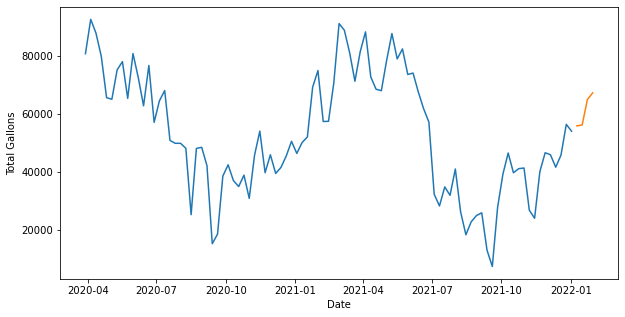

In [65]:
fig= plt.figure(figsize=(10,5))
for frame in [df2, forecast]:
    plt.plot(frame['date'], frame['total gallons'])
plt.xlabel('Date')
plt.ylabel('Total Gallons')
plt.savefig('All.png', dpi=450,bbox_inches="tight")

## Objective 2 Optimization

In [2]:
from pulp import *

### First Contract

In [3]:
prob = LpProblem("Water Gallons", LpMinimize)
#Water Prediction
F1=55939
F2=56263
F3=65031
F4=67348
min_usage=25000

x1 = LpVariable("week1 Water Co", 0)
x2 = LpVariable("week2 Water Co", 0)
x3 = LpVariable("week3 Water Co", 0)
x4 = LpVariable("week4 Water Co", 0)

y1 = LpVariable("week1 Water Tank", 0)
y2 = LpVariable("week2 Water Tank", 0)
y3 = LpVariable("week3 Water Tank", 0)
y4 = LpVariable("week4 Water Tank", 0)

# Objective
prob += 0.15*(x1 + x2 + x3 + x4) + 0.18*(y1 + y2) +0.1*(y3 + y4)

# Constraints
#W1
prob +=x1+y1 >= F1
prob +=x1 >= min_usage
prob +=y1 >= F1*0.25
prob +=y1 <= 32500+12000
#W2
prob +=x2+y2 >= F2
prob +=x2 >= min_usage
prob +=y2 >= F2*0.25
prob +=y2 <= 32500+12000-y1+18000
#W3
prob +=x3+y3 >= F3
prob +=x3 >= min_usage
prob +=y3 >= F3*0.25
prob +=y3 <= 32500+12000-y1+18000+20000-y2
#W4
prob +=x4+y4 >= F4
prob +=x4 >= min_usage
prob +=y4 >= F4*0.25
prob +=y4 <= 32500+12000-y1+18000+20000-y2+22000-y3

prob.solve()

C:\Users\User\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


1

In [4]:
print("Status:", LpStatus[prob.status])

Status: Optimal


In [5]:
for v in prob.variables():
    print(v.name, "=", v.varValue)

week1_Water_Co = 41954.25
week1_Water_Tank = 13984.75
week2_Water_Co = 42197.25
week2_Water_Tank = 14065.75
week3_Water_Co = 30929.5
week3_Water_Tank = 34101.5
week4_Water_Co = 25000.0
week4_Water_Tank = 42348.0


In [6]:
print('Week1 Cost:',0.15*x1.varValue+ 0.18*y1.varValue,'\nWeek2 Cost:',0.15*x2.varValue+ 0.18*y2.varValue,'\nWeek3 Cost:',0.15*x3.varValue+ 0.1*y3.varValue,'\nWeek4 Cost:',0.15*x4.varValue+ 0.1*y4.varValue)

Week1 Cost: 8810.3925 
Week2 Cost: 8861.4225 
Week3 Cost: 8049.575000000001 
Week4 Cost: 7984.8


In [7]:
print("Total Cost =", value(prob.objective))

Total Cost = 33706.19


### Second Contract

In [7]:
prob = LpProblem("Water Gallons", LpMinimize)

F1=55939
F2=56263
F3=65031
F4=67348
min_usage=35000

x1 = LpVariable("week1 Water Co", 0)
x2 = LpVariable("week2 Water Co", 0)
x3 = LpVariable("week3 Water Co", 0)
x4 = LpVariable("week4 Water Co", 0)

y1 = LpVariable("week1 Water Tank", 0)
y2 = LpVariable("week2 Water Tank", 0)
y3 = LpVariable("week3 Water Tank", 0)
y4 = LpVariable("week4 Water Tank", 0)

# Objective
prob += 0.12*(x1 + x2 + x3 + x4) + 0.18*(y1 + y2) +0.1*(y3 + y4)

# Constraints
#W1
prob +=x1+y1 >= F1
prob +=x1 >= min_usage
prob +=y1 >= F1*0.25
prob +=y1 <= 32500+12000
#W2
prob +=x2+y2 >= F2
prob +=x2 >= min_usage
prob +=y2 >= F2*0.25
prob +=y2 <= 32500+12000-y1+18000
#W3
prob +=x3+y3 >= F3
prob +=x3 >= min_usage
prob +=y3 >= F3*0.25
prob +=y3 <= 32500+12000-y1+18000+20000-y2
#W4
prob +=x4+y4 >= F4
prob +=x4 >= min_usage
prob +=y4 >= F4*0.25
prob +=y4 <= 32500+12000-y1+18000+20000-y2+22000-y3

prob.solve()

1

In [8]:
for v in prob.variables():
    print(v.name, "=", v.varValue)

week1_Water_Co = 41954.25
week1_Water_Tank = 13984.75
week2_Water_Co = 42197.25
week2_Water_Tank = 14065.75
week3_Water_Co = 35000.0
week3_Water_Tank = 30031.0
week4_Water_Co = 35000.0
week4_Water_Tank = 32348.0


In [9]:
print('Week1 Cost:',0.12*x1.varValue+ 0.18*y1.varValue,'\nWeek2 Cost:',0.12*x2.varValue+ 0.18*y2.varValue,'\nWeek3 Cost:',0.12*x3.varValue+ 0.1*y3.varValue,'\nWeek4 Cost:',0.12*x4.varValue+ 0.1*y4.varValue)

Week1 Cost: 7551.765 
Week2 Cost: 7595.505 
Week3 Cost: 7203.1 
Week4 Cost: 7434.8


In [10]:
print("Total Cost =", value(prob.objective))

Total Cost = 29785.170000000002
